### 데이터를 그룹화한 경우 예측률이 개선됨

In [1]:
%autosave 0
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping

Autosave disabled


In [7]:
# 데이터 준비
data = np.loadtxt('./country2.csv', delimiter=',', dtype=np.float64)
print(type(data))
print(data.shape)
print(data[:10])

<class 'numpy.ndarray'>
(100, 7)
[[ 0.  0.  0.  5.  1.  0.  0.]
 [ 1.  0.  1.  6.  1.  0.  1.]
 [ 1.  1.  1. 10.  1.  0.  1.]
 [ 0.  0.  0. 10.  1.  0.  0.]
 [ 1.  0.  1. 10.  1.  2.  1.]
 [ 1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  5.  1.  0.  0.]
 [ 1.  0.  1.  6.  1.  0.  1.]
 [ 1.  1.  1. 10.  1.  3.  1.]
 [ 1.  0.  1.  2.  1.  1.  0.]]


In [3]:
# 훈련용 + 검증용: 90 건
x_train = data[0:90, 0:6] # 변수 6개, 0 ~ 5
print(x_train.shape)
y_train = data[0:90, 6] # class 1개
print(y_train.shape)
# 테스트용: 10 건
x_test =data[90:, 0:6]  # 변수 6개, 0 ~ 5
print(x_test.shape)
y_test =data[90:, 6]    # class 1개
print(y_test.shape)

(90, 6)
(90,)
(10, 6)
(10,)


In [4]:
model = Sequential()
# 최적의 모델
model.add(Dense(30, input_dim=6, activation='relu')) # 입력 값: 17, 출력값: 64
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 가장 작은 오차가 20번 발생하면 학습 자동 중지
early_stopping = EarlyStopping(monitor='loss', patience=2)

# validation_split = 0.2: 20% 검증 데이터로 사용
hist = model.fit(x_train, y_train, validation_split = 0.2, 
                 shuffle=True, epochs=1000, 
                 batch_size=3, callbacks=[early_stopping])


Train on 72 samples, validate on 18 samples
Epoch 1/1000
72/72 [==============================] - 1s 12ms/sample - loss: 0.6262 - accuracy: 0.6389 - val_loss: 0.4947 - val_accuracy: 0.6111
Epoch 2/1000
72/72 [==============================] - 0s 648us/sample - loss: 0.5569 - accuracy: 0.6250 - val_loss: 0.4774 - val_accuracy: 0.6111
Epoch 3/1000
72/72 [==============================] - 0s 637us/sample - loss: 0.5333 - accuracy: 0.6806 - val_loss: 0.4654 - val_accuracy: 0.6667
Epoch 4/1000
72/72 [==============================] - 0s 625us/sample - loss: 0.5161 - accuracy: 0.8194 - val_loss: 0.4526 - val_accuracy: 0.8333
Epoch 5/1000
72/72 [==============================] - 0s 667us/sample - loss: 0.4910 - accuracy: 0.8472 - val_loss: 0.4306 - val_accuracy: 0.8333
Epoch 6/1000
72/72 [==============================] - 0s 598us/sample - loss: 0.4704 - accuracy: 0.8472 - val_loss: 0.4150 - val_accuracy: 0.8889
Epoch 7/1000
72/72 [==============================] - 0s 639us/sample - loss: 0.4

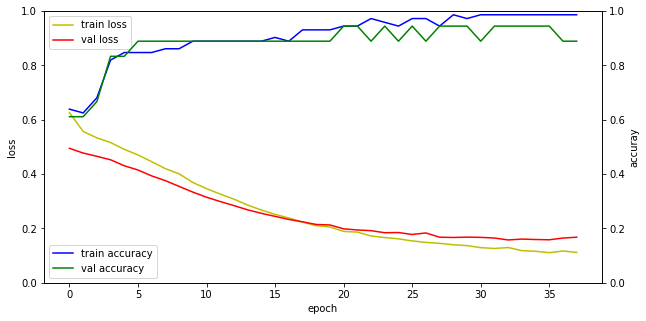

In [5]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 1.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')   # 훈련 정확도
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.43847355917096137 /정확도: 80.0000011920929 %


In [7]:
model.save('Country2.h5')

In [8]:
model = load_model('Country2.h5')

In [9]:
# 1) 주당 음주 횟수: 0 ~ 3(3회 이상)
# 2) 농촌에서 생활적이 있다: 0(없음), 1(있음)
# 3) 가족중에 농촌에서 생활하고 있는 친척있는 여부: 0(없음), 1(있음)
# 4) 1년동안의 여행 횟수: 0 ~ 12
#     (12이상, 교통을 이용한 등산/캠핑, 당일, 국내, 국외 모두 해당)
# 5) 집을 소유 할 수 있는 경제력: 0(없음), 1(있음)
# 6) 경작 할 수 있는 토지 평수: 0 ~ (평)
#     0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상
# 7) 정착: 1, 실패: 0
        
drink = int(input('주당 음주 횟수는 (0 ~ 3(3회 이상)):'))
life = int(input('농촌에서 생활한 경험(0(없음), 1(있음)):'))
life2 = int(input('가족중에 농촌에서 생활하고 있는 친척있는 여부(0(없음), 1(있음)):'))
trip = int(input('1년동안의 여행 횟수(0 ~ 12):'))
house = int(input('집을 소유 할 수 있는 경제력(0(없음), 1(있음)):'))
land = int(input('경작 할 수 있는 토지 평수(0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상):'))

주당 음주 횟수는 (0 ~ 3(3회 이상)):2
농촌에서 생활한 경험(0(없음), 1(있음)):1
가족중에 농촌에서 생활하고 있는 친척있는 여부(0(없음), 1(있음)):1
1년동안의 여행 횟수(0 ~ 12):8
집을 소유 할 수 있는 경제력(0(없음), 1(있음)):1
경작 할 수 있는 토지 평수(0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상):1


In [10]:
data = []
data.append(drink)
data.append(life)
data.append(life2)
data.append(trip)
data.append(house)
data.append(land)

x = np.array([
             data,
      ])
print(x.shape)
print(x)

(1, 6)
[[2 1 1 8 1 1]]


In [11]:
yp = model.predict(x)
print(yp)
print(yp.shape)

for i in range(len(x)):
    # print('적응 확률:', yp[i][0] * 100, ' %')
    print('적응 확률: {0:.3f}%'.format(yp[i][0] * 100))
    
    if yp[i][0] >= 0.8:
        print('귀농가능합니다.')
    elif yp[i][0]  >= 0.5:
        print('귀촌을 권장합니다.')
    else:
        print('귀농/귀촌을 권장하지 않습니다.')


[[0.97398585]]
(1, 1)
적응 확률: 97.399%
귀농가능합니다.
